In [1]:
from utils import *

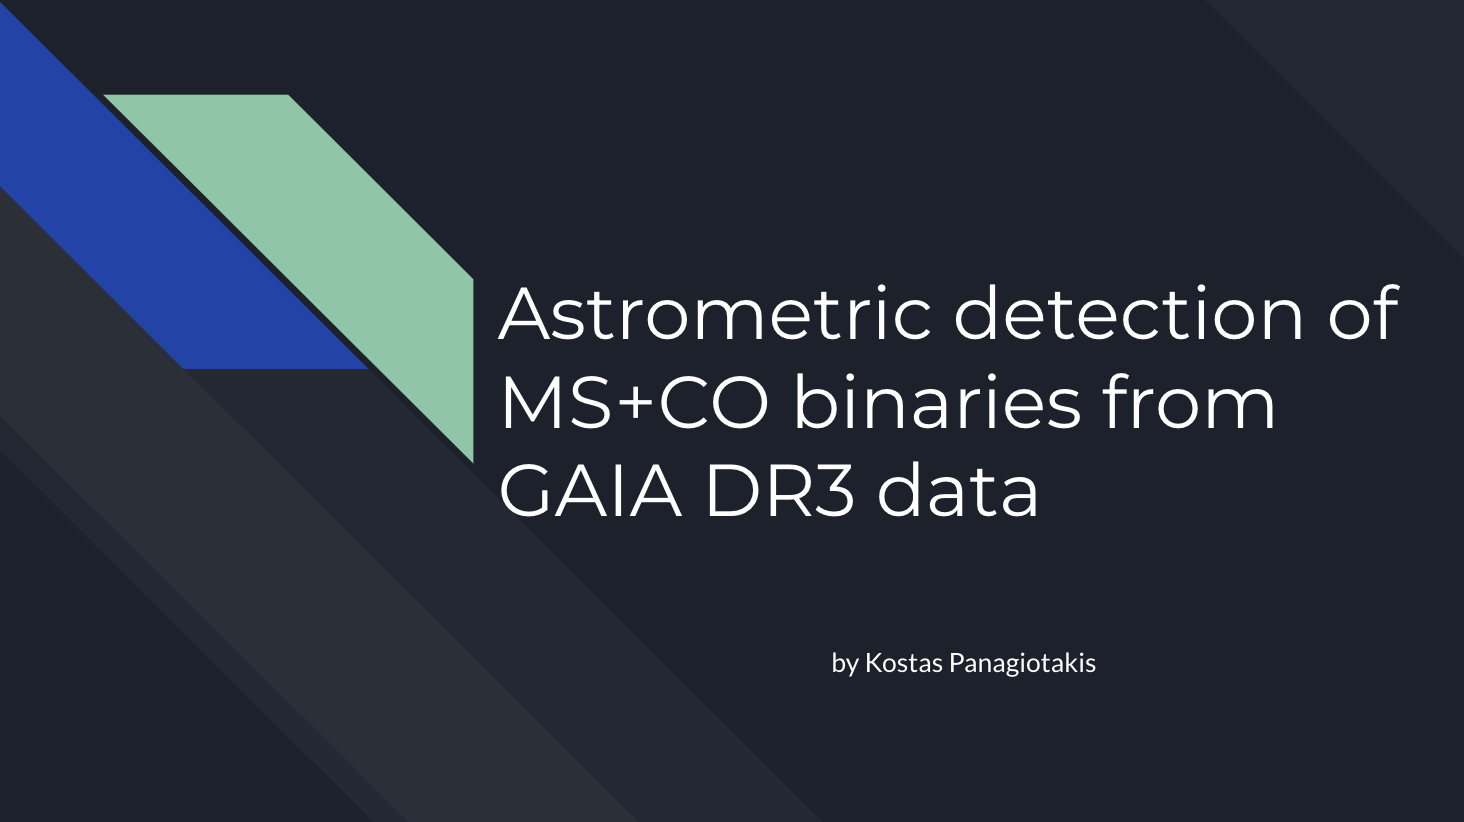

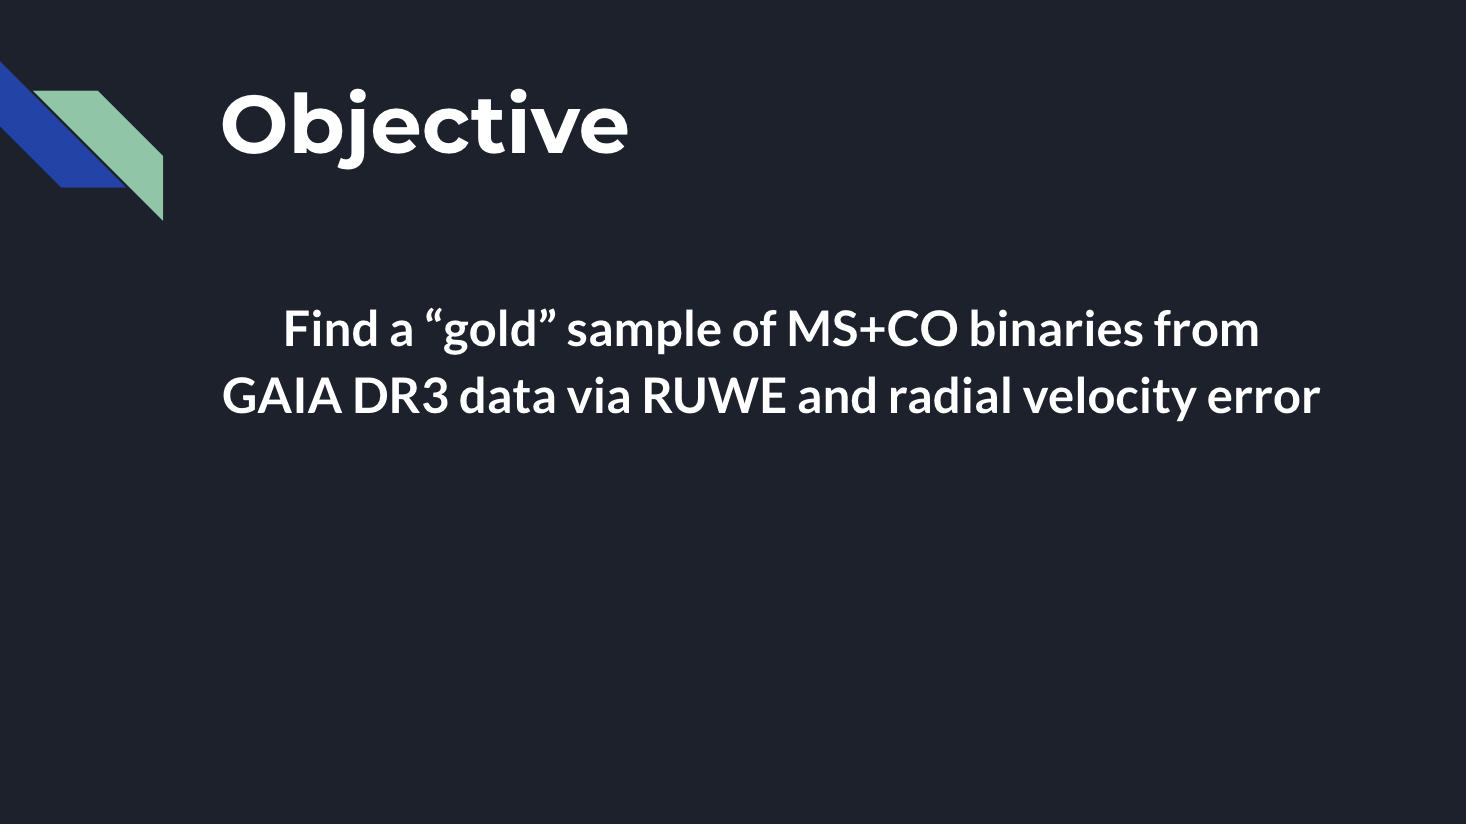

In [2]:
# Display an image from a local file with specified size
img_path = 'images/Title.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

# Display an image from a local file with specified size
img_path = 'images/Objective.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

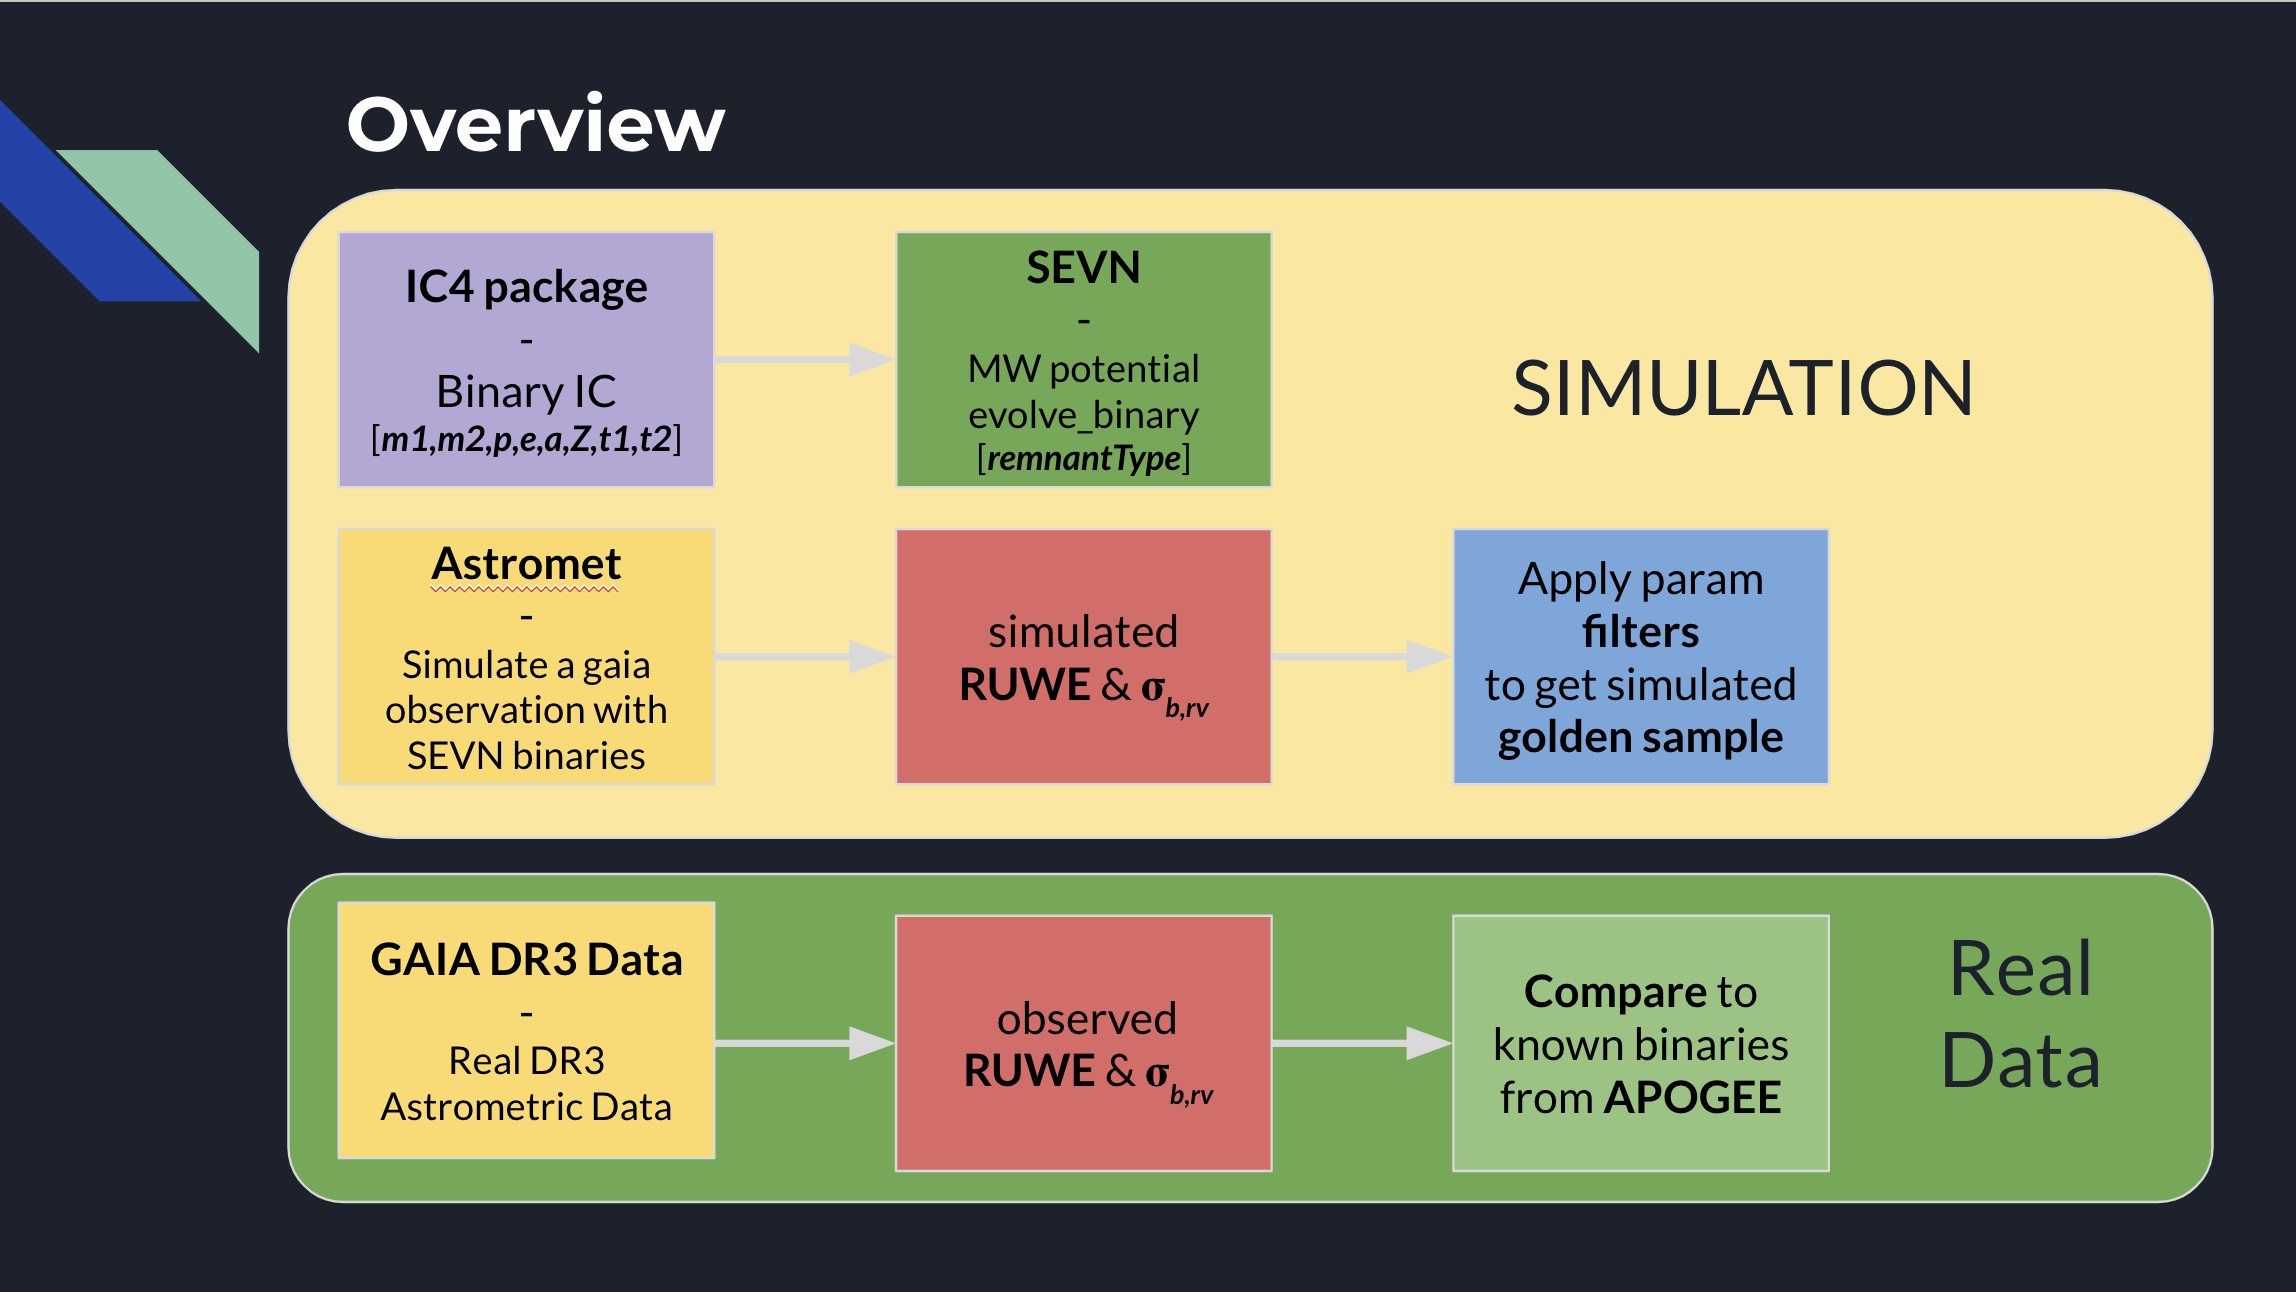

In [3]:
# Display an image from a local file with specified size
img_path = 'images/Overview.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

Astromet Notes

1) Feed in evolved binary parameters from SEVN
2) Compute the astrometric track for a binary system
3) Simulates realistic astrometric measurements 
4) Iterative optimization to fit an astrometric solution using the provided observation data
5) Extracts the results
6) Calculate Errors: RUWE and radial velocity error

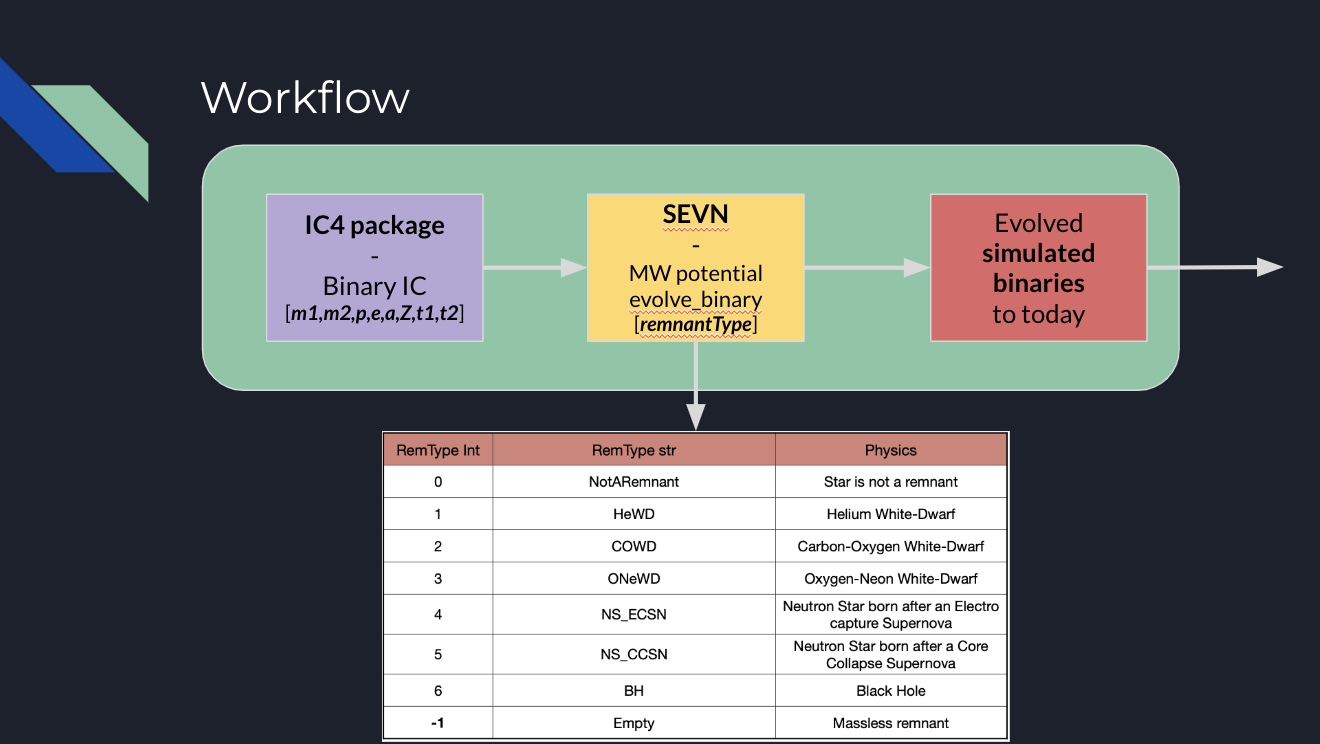

In [29]:
# Display an image from a local file with specified size
img_path = 'images/Workflow_1.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

### **IC4 package**

IC4popsyn is a python module developed for generating the IC for stellar population-synthesis studies. 

In paricular, IC4popsyn includes some of the most used state-of-the-art models (e.g Sana+12) and implements the possibility to generate the IC in the format used by our population synthesis codes (i.e. MOBSE and SEVN).


#### **Default parameters**:
- **alphas**: list of power-law slopes for the initial mass function
- **mass_ranges**: list of mass ranges for the initial mass function
- **logP_min**: minimum logarithm of the period
- **logP_max**: maximum logarithm of the period
- **logP_slope**: slope of the period distribution
- **e_min**: minimum eccentricity
- **e_max**: maximum eccentricity
- **e_slope**: slope of the eccentricity distribution
- **q_min**: minimum mass ratio
- **q_max**: maximum mass ratio
- **q_slope**: slope of the mass ratio distribution
- **mass_min**: minimum mass
- **mass_min_policy**: policy for minimum mass ("qmin" or "mmin")


## Sampling of Binary Star Properties

In the `Binaries` class, the properties of binary stars are sampled as follows:

- **Primary Mass \( m_1 \)**: Drawn from an Initial Mass Function (IMF), reflecting the distribution of star masses.
- **Secondary Mass \( m_2 \)**: Determined by a mass ratio \( q \) (where \( q = m_2/m_1 \)), sampled from a power law distribution, ensuring \( m_2 \) meets specified limits.
- **Orbital Period \( p \)**: Sampled using a power law distribution over a defined range of logarithmic periods, resulting in realistic orbital periods.
- **Eccentricity \( e \)**: Sampled from a power law distribution between defined minimum and maximum values.
- **Semi-Major Axis \( a \)**: Derived from the period \( p \) using Kepler's laws, linking the period and masses to the separation.

### Power Law Definition

A power law describes a relationship where one quantity varies as a power of another, expressed as \( y = kx^n \), where \( k \) is a constant, \( x \) is the variable, and \( n \) is the exponent. This distribution is often used to characterize the frequency of occurrences across various values, such as masses and orbital periods.


A **broken power-law** for the Initial Mass Function (IMF) is a piecewise-defined function where the slope of the power law changes at certain mass thresholds

$\xi(m)$ =

 \begin{cases}
m^{-1.3}, & \text{if } 0.08 \leq m < 0.5 M_\odot \\
m^{-2.3}, & \text{if } 0.5 \leq m < 1 M_\odot \\
m^{-2.3}, & \text{if } m \geq 1 M_\odot
\end{cases}

### **Simulate Nbin binaries with IC4popsyn**

In [5]:
# Example usage
create_binary_population(Nbin=1001, backup=1, z=0.02, mass_ranges=[2.3, 150], alphas=[-2.3], q_max=3.0, mass_min=2.3, model='sana12', period_units='yr')

/ |#                                                  | 0 Elapsed Time: 0:00:00


| |#                                                 | 83 Elapsed Time: 0:00:00


Building a population of binaries based on Sana+2012 and Kroupa2001


### **Convert IC files from .in to csvs**

In [6]:
convert_in_to_csv("petar_0.02.in", "petar_0.02.csv")

ic_df = pd.read_csv("petar_0.02.csv")

# add a column to df_petar for binary_id equal to the index place it at the beginning
ic_df.insert(0, 'binary_id', range(0, 0 + len(ic_df)))

ic_df.describe()

/home/sevnuser/sevn/utils.py:1053: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(input_file, delim_whitespace=True, header=None, skiprows=1)


Conversion successful! Saved as petar_0.02.csv


,binary_id,m1,m2,type1,type2,period,eccentricity,a,Z,tini
count,1001.000000,1001.000000,1001.000000,1001.0,1001.0,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.0
mean,500.000000,7.499438,11.768592,1.0,1.0,37.913049,0.369653,3300.803548,2.000000e-02,0.0
std,289.108111,12.819909,16.968213,0.0,0.0,118.332896,0.302119,8192.850804,3.471181e-18,0.0
min,0.000000,2.304200,2.300200,1.0,1.0,0.003877,0.000000,9.419620,2.000000e-02,0.0
25%,250.000000,2.874700,4.541600,1.0,1.0,0.013196,0.090600,28.948573,2.000000e-02,0.0
50%,500.000000,3.874400,6.889000,1.0,1.0,0.143358,0.307800,136.358378,2.000000e-02,0.0
75%,750.000000,6.633000,10.668500,1.0,1.0,6.257209,0.616000,1710.192718,2.000000e-02,0.0
max,1000.000000,141.845200,170.746500,1.0,1.0,865.212361,0.997200,59898.872953,2.000000e-02,0.0


In [7]:
# export to csv
ic_df.to_csv('petar_0.02.csv', index=False)

### **Evolve Binaries with SEVN**

In [8]:
evolved_binaries = run_sevn_simulations(ic_df, num_rows=1001, t_end=1000, snmodel="delayed", rseed=0)

Running SEVN simulations: 100%|██████████| 1001/1001 [02:02<00:00,  8.19it/s]


### **Use astromet + SEVN distributions to mock GAIA observations**

4) Use those parameters distributions as input to astromet

5) Calculate simulated RUWE and rv error  

Question - I am calculating the ruwe using the astrometric_chi2_al, astrometric_n_good_obs_al and astrometric_params_solved, I am getting a large astrometric_chi2_al calculated by R represents the residuals of the fit. Residuals are the differences between the observed values and the values predicted by the model.

6) Plot RUWE vs rv error color coded by remnant type

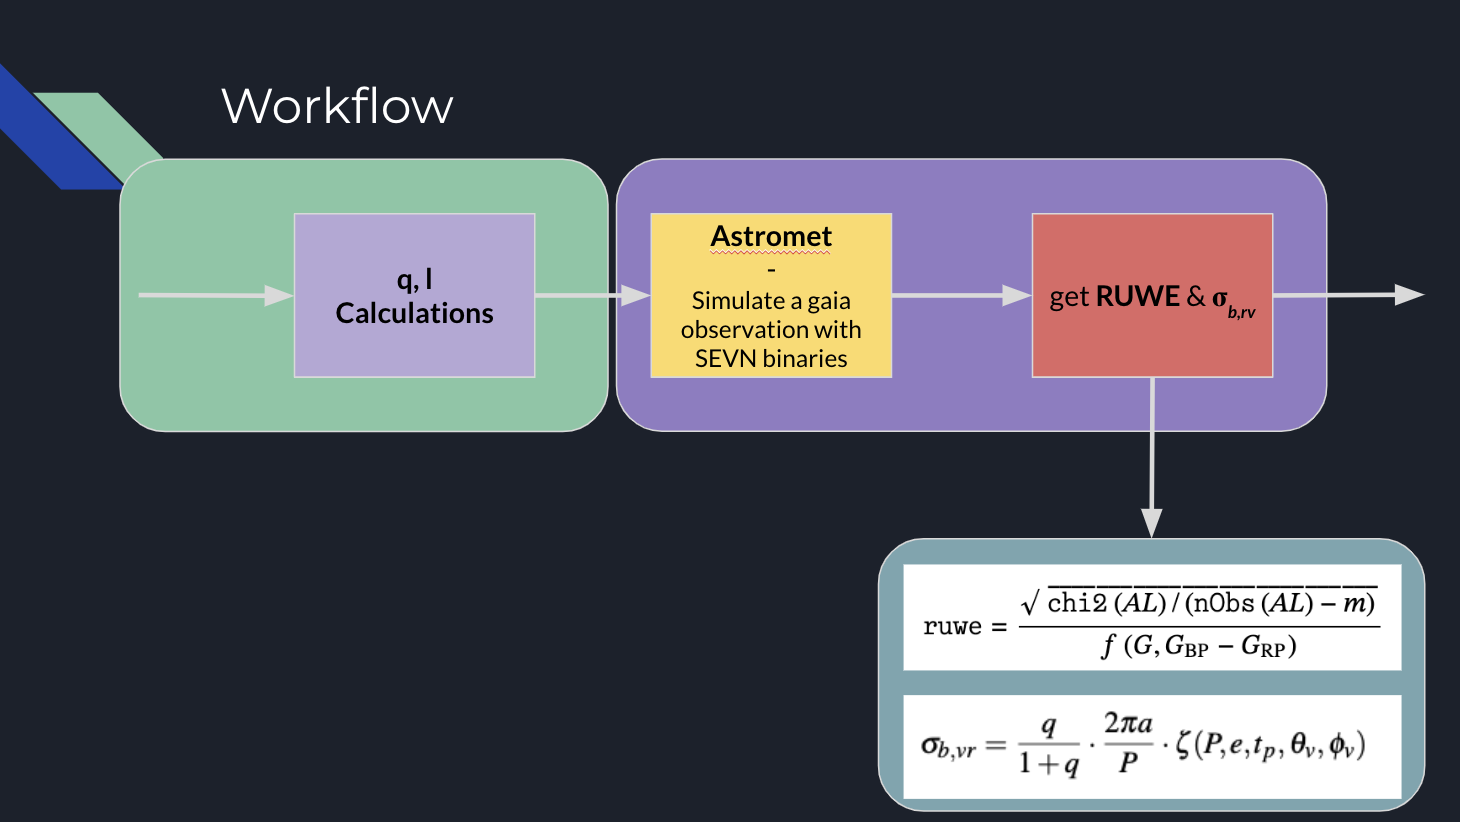

In [9]:
# Display an image from a local file with specified size
img_path = 'images/Workflow_2.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

### Load ScanLaw file

It loads the scanning law times from the CSV file 

In [10]:
# /Gaia/gedr3/auxiliary/commanded_scan_law/ @ https://cdn.gea.esac.esa.int/Gaia/gedr3/auxiliary/commanded_scan_law/
local_csv_filename = "data/cog/CommandedScanLaw_001.csv"

# Load the scanning law times from a local CSV file with the specified filename and version
dr3_sl = scanninglaw.times.Times(map_fname=local_csv_filename, version='dr3_nominal')

Loading auxilliary data ...
t = 41.832 s
  auxilliary:  25.638 s
          sf:   5.220 s
interpolator:  10.974 s


In [11]:
# Keep in the dataframe only Periods less than dr3Period = 2.8333333333333335 years
# convert dr3Period to Myr
# dr3Period = dr3Period * 10**6
# evolved_binaries = evolved_binaries[evolved_binaries['Period'] <= dr3Period]

### **Calculate q, l**

In [12]:
# using evolved_binaries dataframe calculate the mass ratio q and luminosity ratio l
evolved_binaries['q'] = evolved_binaries['Mass_1'] / evolved_binaries['Mass_0']
evolved_binaries['l'] = evolved_binaries['Luminosity_1'] / evolved_binaries['Luminosity_0']

In [13]:
# show me all the columns
pd.set_option('display.max_columns', None)
# show me the first 5 rows
evolved_binaries.head()

,Worldtime,Semimajor,Eccentricity,Period,RL0,RL1,GWtime,BEvent,Localtime_0,Localtime_1,Mass_0,Mass_1,Radius_0,Radius_1,Inertia_0,Inertia_1,Luminosity_0,Luminosity_1,Temperature_0,Temperature_1,MHE_0,MHE_1,MCO_0,MCO_1,RHE_0,RHE_1,RCO_0,RCO_1,Phase_0,Phase_1,RemnantType_0,RemnantType_1,PhaseBSE_0,PhaseBSE_1,Spin_0,Spin_1,Ebind_0,Ebind_1,Zams_0,Zams_1,Event_0,Event_1,dMRLOdt_0,dMRLOdt_1,dMaccwinddt_0,dMaccwinddt_1,Plife_0,Plife_1,binary_id,q,l
0,0.000000,4602.148993,0.5765,17.451196,1361.853501,2153.974631,2.458801e+12,-1.0,0.745864,0.156510,8.606300,23.584946,3.534327,6.211900,10.750535,91.008882,3505.064730,68008.536671,23623.660762,37398.588956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000e+00,0.000000e+00,0.0,0.0,8.6064,23.6012,-1.0,-1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0,2.740428,19.402933
1,0.662682,4612.207490,0.5765,17.527605,1365.888423,2157.464484,2.493256e+12,-1.0,1.408546,0.819192,8.606207,23.514680,3.580617,6.596732,11.033863,102.328524,3557.287255,72216.670158,23557.399983,36840.162367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.289986e-23,5.223795e-22,0.0,0.0,8.6064,23.6012,-1.0,-1.0,0.0,0.0,3.736360e-07,9.001075e-09,0.023665,0.100000,0,2.732293,20.301051
2,1.230662,4620.866278,0.5765,17.593510,1369.364498,2160.466037,2.523243e+12,-1.0,1.976526,1.387172,8.606126,23.454455,3.620774,6.945487,11.282638,113.143792,3602.665592,76030.057693,23500.756282,36368.179781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,6.328719e-23,1.233010e-21,0.0,0.0,8.6064,23.6012,-1.0,-1.0,0.0,0.0,4.217514e-07,9.149936e-09,0.043948,0.185709,0,2.725321,21.103834
3,1.796230,4629.520694,0.5765,17.659505,1372.841511,2163.463322,2.553522e+12,-1.0,2.542094,1.952740,8.606047,23.394486,3.661208,7.311080,11.535929,125.047967,3648.426431,80027.323702,23444.488419,35904.209711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,9.553222e-23,2.289548e-21,0.0,0.0,8.6064,23.6012,-1.0,-1.0,0.0,0.0,4.678793e-07,9.272673e-09,0.064145,0.271055,0,2.718378,21.934751
4,2.361737,4638.206602,0.5765,17.725865,1376.333892,2166.468739,2.584224e+12,-1.0,3.107601,2.518247,8.605967,23.334523,3.702089,7.695875,11.794878,138.202206,3694.763464,84234.277236,23388.361357,35446.208125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.298901e-22,3.872813e-21,0.0,0.0,8.6064,23.6012,-1.0,-1.0,0.0,0.0,5.188109e-07,9.396128e-09,0.084340,0.356391,0,2.711435,22.798287


###### Parallax is a measure of the apparent shift in position of a star due to the Earth's movement around the Sun and is typically measured in milliarcseconds (mas). Not calculated, sampled from a distribution in astromet

### 1) Drop all NaN values represeting the "disintegration" of the binary given a SN or other event
### 2) Keep only the last row of that star representing it's end of the evolution cycle
### 3) Set binary id as index

In [14]:
# remove nan values
evolved_binaries = evolved_binaries.dropna()

# keep only the last row where binary_id is unique
evolved_binaries = evolved_binaries.drop_duplicates(subset=['binary_id'], keep='last')

# make the binary_id the index
evolved_binaries = evolved_binaries.set_index('binary_id')

In [15]:
# display the first 5 rows with Worldtime, Semimajor, Eccentricity, Mass_0, Mass_1, q, l, Remnant_0, Remnant_1, Period, Parallax for RemnantType_1 == 6
evolved_binaries[evolved_binaries['RemnantType_1'] == 6][['Worldtime', 'Semimajor', 'Eccentricity', 'Mass_0', 'Mass_1', 'q', 'l', 'RemnantType_0', 'RemnantType_1', "Period"]].head(10)


,Worldtime,Semimajor,Eccentricity,Mass_0,Mass_1,q,l,RemnantType_0,RemnantType_1,Period
binary_id,,,,,,,,,,
30,9.329924,924.083934,0.000000,6.622897,6.129682,0.925529,5.856940e-16,0.0,6.0,2.494716
84,1000.000000,251.601697,0.773514,3.203595,15.324399,4.783500,1.000000e+00,6.0,6.0,0.294042
93,7.371561,2220.041270,0.851671,20.729936,4.244346,0.204745,7.444337e-16,0.0,6.0,6.638167
152,9.489059,92888.482364,0.872226,15.263671,11.558884,0.757281,6.028901e-16,0.0,6.0,1733.587709
163,8.184215,1224.937622,0.000000,7.532972,12.571407,1.668851,4.499076e-16,0.0,6.0,3.032346
186,8.311508,56.392552,0.000000,5.144608,3.650894,0.709654,7.870128e-16,0.0,6.0,0.045285
217,1000.000000,7731.406871,0.348611,11.482932,14.817584,1.290401,1.000000e+00,6.0,6.0,42.039617
251,4.497469,4774.597437,0.144286,9.232361,14.860975,1.609661,3.334199e-16,0.0,6.0,21.316198
253,1000.000000,418.822654,0.016241,12.641553,13.098430,1.036141,1.000000e+00,6.0,6.0,0.535790


### Simulate a **Gaia Observation** with astromet and calculate **RUWE**

1) Feed in evolved binary parameters from SEVN
2) Compute the astrometric track for a binary system
3) Simulates realistic astrometric measurements 
4) Iterative optimization to fit an astrometric solution using the provided observation data
5) Extracts the results

In [16]:
nTest=1001

allData = gaia_observation(nTest, evolved_binaries, astromet, Source, dr3_sl)

100%|██████████| 1001/1001 [01:23<00:00, 12.01it/s]


In [17]:
df = allData.to_pandas()

### Calculate $\zeta_0$ (P = B)

##### this result agrees well for all P < B but deviates at longer periods - Andrew et al

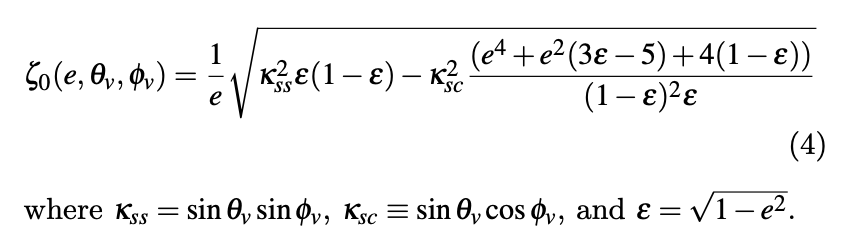

In [18]:
# Display an image from a local file with specified size
img_path = 'images/zeta_0.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed

In [19]:
# test the function on df['e'], df['vTheta'], df['vPhi']
df['zeta_0'], indeces = zeta_0(df['e'], df['vTheta'], df['vPhi'])

/home/sevnuser/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Calculate Radial Velocity Error
        
#### Assume P<=B and zeta = zeta_0

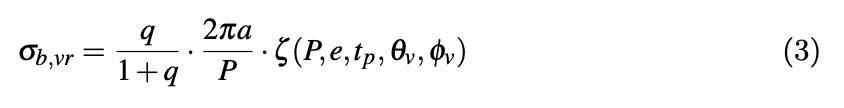

In [20]:
# Display an image from a local file with specified size
img_path = 'images/spectr_error.png'
display(Image(filename=img_path, width=400, height=300))  # Adjust width and height as needed


### Units: 
- q (none)
- a (AU)
- P (yrs)
- $\zeta_0$ (none)

$\sigma_{(b),(vr)}$ $\left(\frac{\text{AU}}{\text{yrs}}\right)$

In [21]:
df['sigma_spectroscopic_error'] = sigma_spectroscopic_error(df['q'], df['a'], df['P'], df['zeta_0'])

In [28]:
df['ruwe']

0       1523.090989
1         73.139396
2          1.143898
3          1.093715
4          2.132265
           ...     
996        1.032094
997        1.048401
998       28.541395
999      677.564564
1000     576.410810
Name: ruwe, Length: 1001, dtype: float64

## Plot RUWE vs sigma_spectroscopic_error

In [22]:
remnant_type = {0: "NotARemnant - 0", 1: "HeWD - 1", 2: "COWD - 2", 3: "ONeWD - 3", 4: "NS_ECSN - 4",
                5: "NS_CCSN - 5", 6: "BH - 6", -1: "Empty - -1"}

/home/sevnuser/sevn/utils.py:384: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/home/sevnuser/sevn/utils.py:384: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/home/sevnuser/sevn/utils.py:384: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/home/sevnuser/sevn/utils.py:384: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)


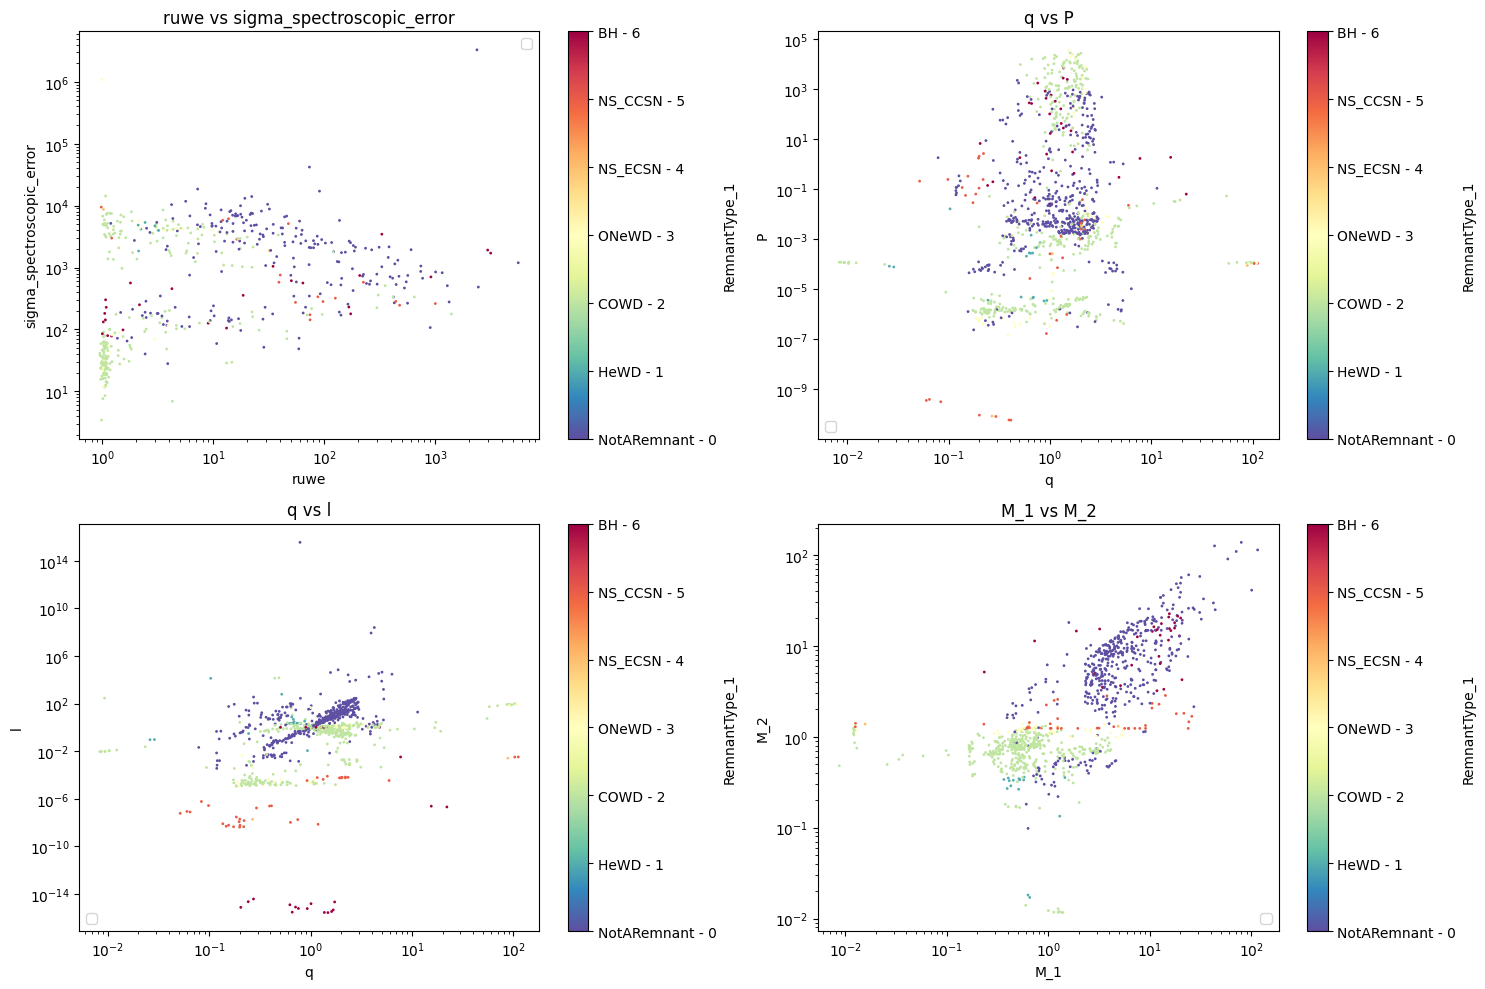

In [23]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
plot_scatter_with_colorbar_combined(df, 'ruwe', 'sigma_spectroscopic_error', 'RemnantType_1', remnant_type, axs[0, 0], legend_loc='best')

# Plot 2
plot_scatter_with_colorbar_combined(df, 'q', 'P', 'RemnantType_1', remnant_type, axs[0, 1], legend_loc='lower left')

# Plot 3
plot_scatter_with_colorbar_combined(df, 'q', 'l', 'RemnantType_1', remnant_type, axs[1, 0], legend_loc='lower left')

# Plot 4
plot_scatter_with_colorbar_combined(df, 'M_1', 'M_2', 'RemnantType_1', remnant_type, axs[1, 1], legend_loc='lower right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### HR Diagram

To plot the simulated data on the HR diagram I need to convert luminosity and temperature into Absolute Magnitude and Color Index respectively to plot on the same HR diagram. 

Use tabulated data such as MESA Isochrones to extract the absolute magnitude M and color index (B-V) corresponding to a star's mass, temperature, or luminosity at different ages.



In [24]:
# Example usage
file_path = 'data/cog/gaia_dr3_cross.csv'
cross_df_filtered = process_gaia_data(file_path)

In [25]:
df_updated = match_and_update(df, cross_df_filtered)

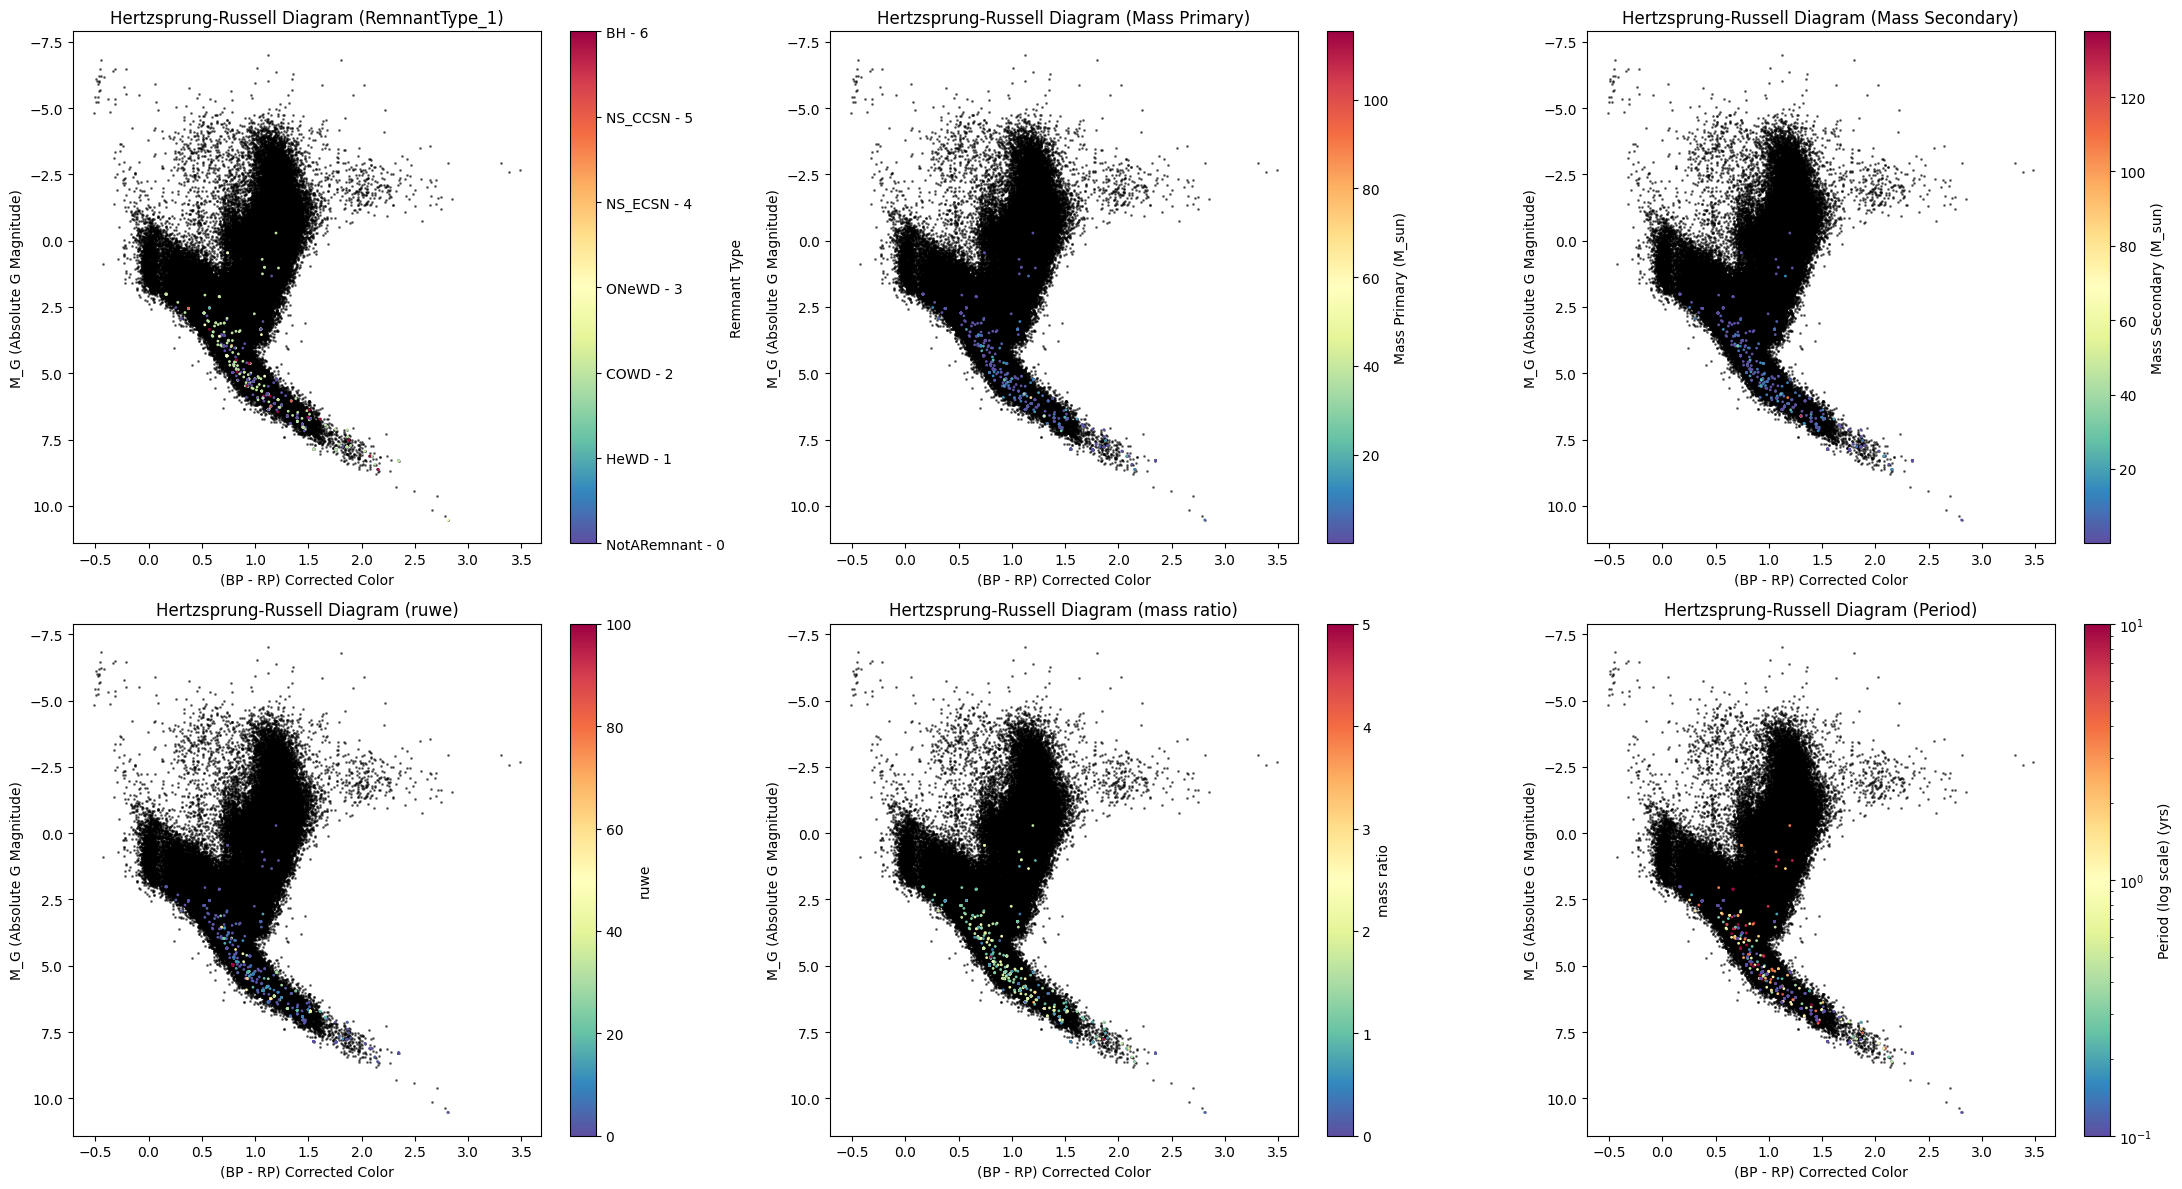

In [26]:
plot_hr_diagrams(df, cross_df_filtered)

# HR Diagram with \( M_G \) and \( BP - RP \)

The Hertzsprung-Russell (HR) diagram is a fundamental tool in astronomy that classifies stars based on their luminosity, temperature, and other properties. In this specific representation, we plot:

- **\( M_G \)**: The absolute magnitude of the star in the G band. This measures the intrinsic brightness of a star.

- **\( BP - RP \)**: The color index derived from the difference between the blue photometer (BP) and red photometer (RP) measurements. This value indicates the star's temperature, with bluer stars having lower values and redder stars having higher values.

### Key Features of the HR Diagram

- **Axes Orientation**: 
  - The y-axis (\( M_G \)) is inverted, meaning that higher values (brighter stars) appear lower on the graph.
  - The x-axis (\( BP - RP \)) measures temperature, with bluer (hotter) stars on the left and redder (cooler) stars on the right.

- **Stellar Evolution**: 
  - The diagram reveals various stellar populations, including:
    - **Main Sequence**: A diagonal line from the top left (hot, bright) to the bottom right (cool, dim).
    - **Giants and Supergiants**: Located above the main sequence, indicating they are bright but cooler than main sequence stars of the same luminosity.
    - **White Dwarfs**: Found in the lower left, representing remnants of stars that have shed their outer layers.

### Interpretation

- **Stellar Classification**: The diagram allows astronomers to classify stars based on their physical properties and evolutionary stages.
- **Color and Temperature Correlation**: The relationship between \( BP - RP \) and temperature enables the inference of various characteristics of stars, such as their mass, age, and composition.

Overall, this version of the HR diagram serves as a vital tool for understanding stellar populations and their evolution in the universe.

## Main issues:

1) 1-2 order of magnitudes greater than expected values for Ruwe - using the astrometric_chi2_al, astrometric_n_good_obs_al and astrometric_params_solved, I am getting a large astrometric_chi2_al calculated by R represents the residuals of the fit. Residuals are the differences between the observed values and the values predicted by the model.

2) Use MESA Isochrones,  to extract the absolute magnitude M and color index (B-V) corresponding to a star's mass, temperature, or luminosity to overplot M_G and color index for simulated binaries.

Table: UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)

Columns: Teff, [Fe/H], Gaia_G_EDR3, Gaia_BP_EDR3, Gaia_RP_EDR3: Gaia EDR3 (Early Data Release 3) magnitudes for G, BP, and RP filters.

### Work for next weeks:

1) Fix issues

2) Look at cogsworth to evolve a population of stars using population synthesis and galactic dynamics together and see what happens instead of IC4 and SEVN.

3) Work with Real Data of Gaia DR3 and search for MS+CO binaries given the filtered ranges from the parameter spaces analyzed in the simulations

4) Compare to APOGEE


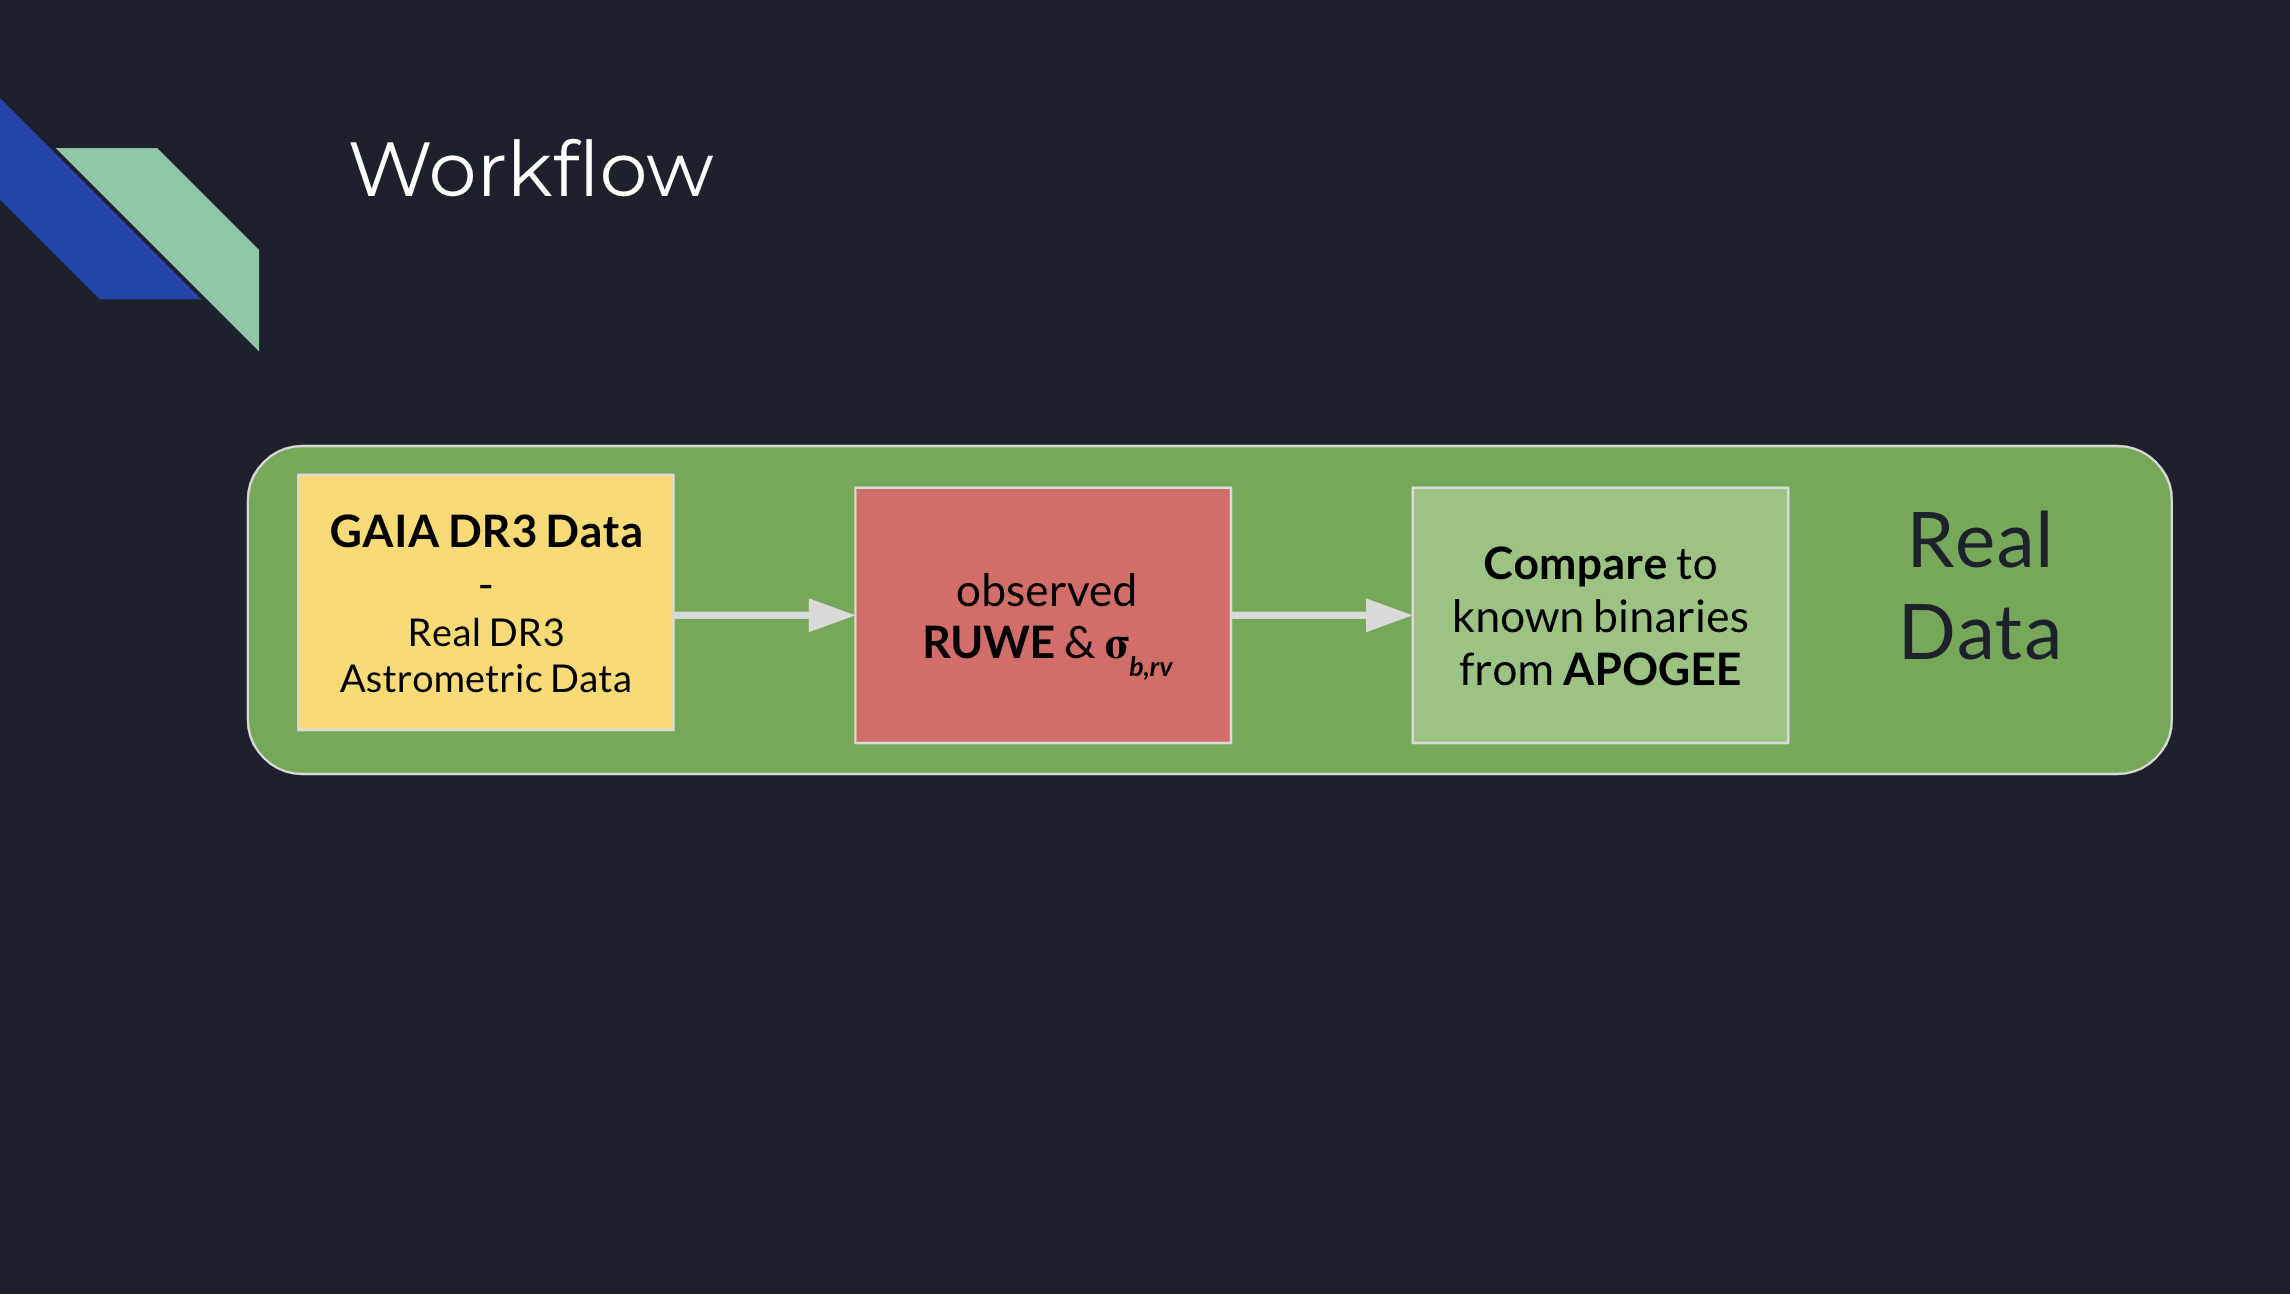

In [30]:
# Display an image from a local file with specified size
img_path = 'images/Workflow_4.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed